In [1]:
import cellular_automata as ca
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [2]:
def cell_type_to_number(cell_type):
    return {'N': 0, 'C': 1, 'E': 2, 'D': 3}[cell_type]

def convert_matrix(M):
    numeric_M = np.vectorize(cell_type_to_number)(M)
    return numeric_M

def simulate_tumor_growth(time_delay, generations, rows, cols, phi, rho, k1, k2, k3, k4, cancer_init_positions, origin):
    history = {}
    M = ca.initialize_grid(rows, cols, cancer_init_positions)

    plt.figure(figsize=(20, 8))
    iteration_numbers = []
    plot_count = 0

    for g in range(generations):
        iteration_numbers.append(g)
        M = ca.simulate_tumor_growth_one_step(M, g, time_delay, history, phi, rho, k1, k2, k3, k4, origin, rows, cols)
        if g % 20 == 0:
            plot_count += 1
            plt.subplot(1, min(5, generations // 20), plot_count)
            plt.imshow(convert_matrix(M), cmap=ListedColormap(['white', 'black', 'red', 'green']))
            plt.title(f'Generation {g}')
            plt.axis('off')

            if plot_count == 5:
                plt.show()
                plt.figure(figsize=(20, 8))
                plot_count = 0
    plt.show()
    return history


In [3]:
GENERATIONS = 100
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K1, K2, K3, K4 = 0.74, 0.2, 0.4, 0.4
RHO = 3.85
TAU = 7

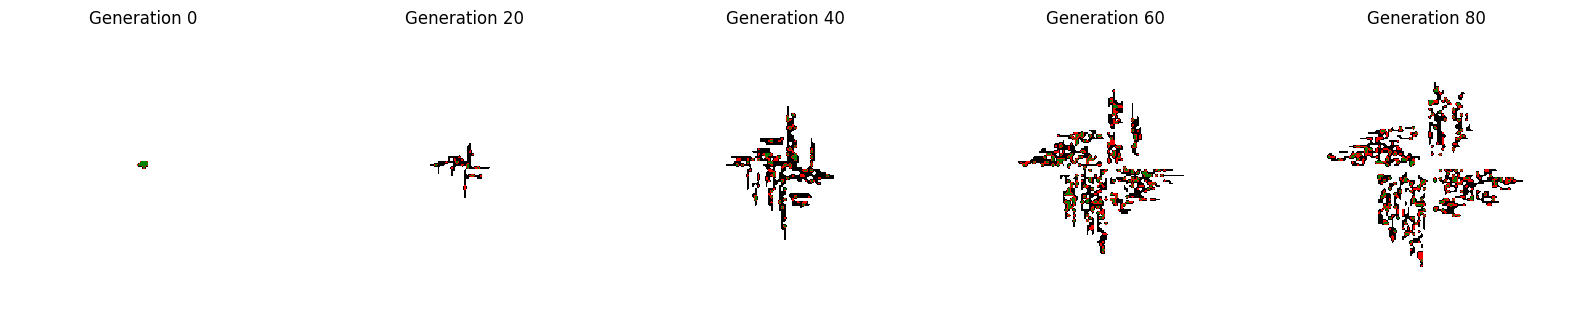

<Figure size 2000x800 with 0 Axes>

In [4]:
history = simulate_tumor_growth(TAU, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)